In [41]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [4]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

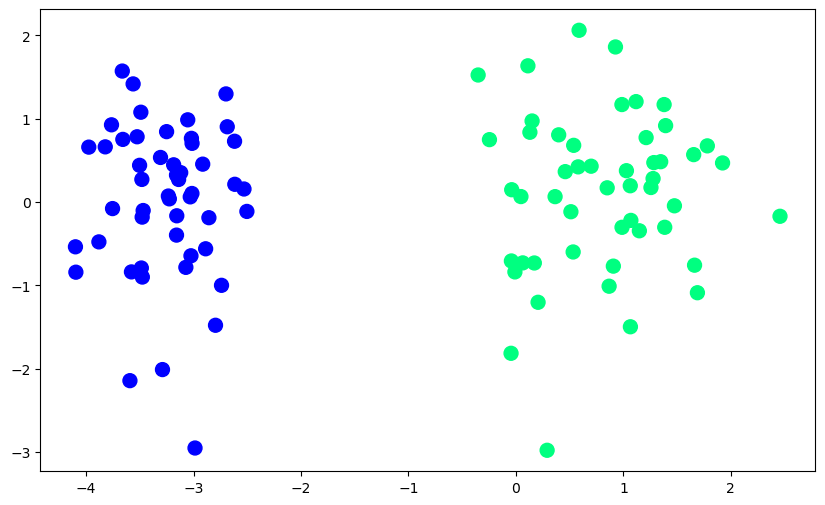

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

1 is added as a bias term : make predictions even when all input features are zero;
In geometric terms, the bias term determines the position of the regression line or hyperplane in the feature space. 
Hence, the model gains the flexibility to capture more complex relationships between the features and the target variable

In [44]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1]) # creating an array of weights where the shape = x[column],here it is[1,1,1]
    lr = 0.1

    for i in range(1000):
        j=np.random.randint(0,100) #selecting a random int from 1 to 100, basically we are randomly picking up the query point from the list
        y_pred = step(np.dot(X[j],weights))# calculating Ax+By+C and then applying step function
        weights += lr * (y[j] - y_pred) * X[j]

    return weights[0],weights[1:]

In [43]:
def step(z):
    return 1 if z>0 else 0

In [45]:
intercept_, coef_ =perceptron(X,y)
print(intercept_)
print(coef_)

1.3000000000000003
[1.05343617 0.2221512 ]


Ax+By+C=0 -> y=mx+b

In [46]:
m= - (coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [48]:
m1 = -(log_reg.coef_[0][0]/log_reg.coef_[0][1])
b1= -(log_reg.intercept_/log_reg.coef_[0][1])

In [49]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


In [50]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input + b1

(-3.0, 2.0)

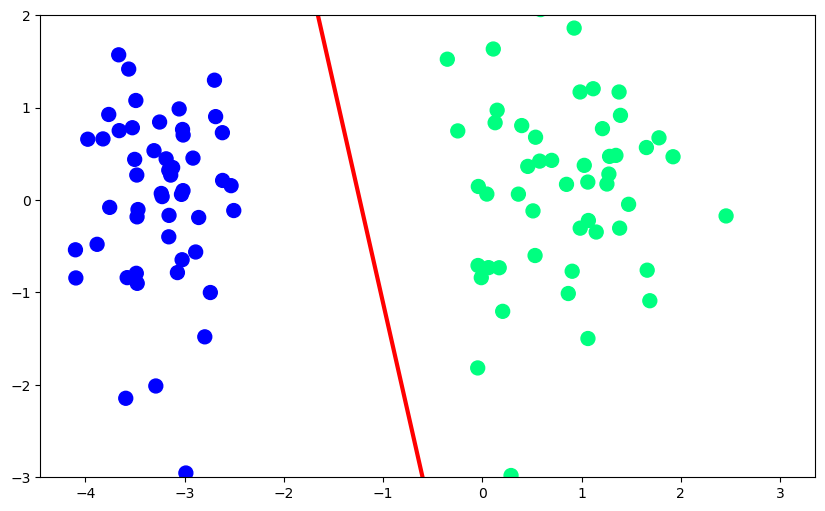

In [51]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)




(-3.0, 2.0)

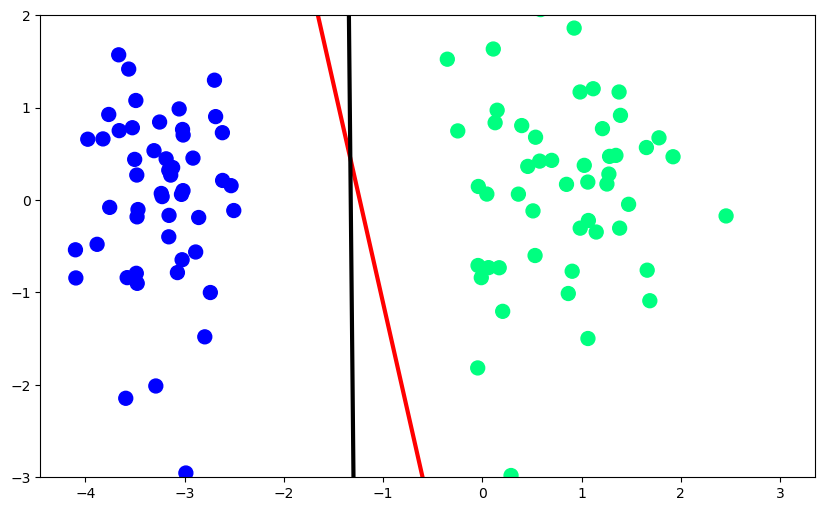

In [52]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [53]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [54]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_pred =sigmoid(np.dot(X[j] , weights))
        weights += lr*(y[j]-y_pred)*X[j]
        
    return weights[0],weights[1:]

In [55]:
intercept_,coef_ = perceptron(X,y)

m2= -(coef_[0]/coef_[1])
b2= -(intercept_/coef_[1])

In [58]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input + b2

(-3.0, 2.0)

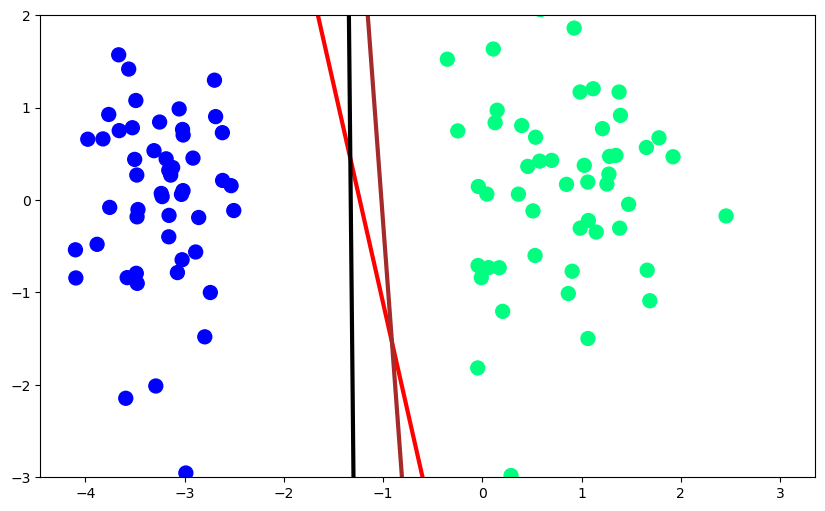

In [59]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)